In [74]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
#Reading the data set

data = pd.read_csv("cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# DATA CLEANING

In [76]:
# Determining null values in the dataset

data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean              21
perimeter_mean             0
area_mean                  0
smoothness_mean           48
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean             65
fractal_dimension_mean     0
radius_SE                  0
texture_SE                21
perimeter_SE               0
area_SE                    0
smoothness_SE             48
compactness_SE             0
concavity_SE               0
concave_points_SE          0
symmetry_SE               65
fractal_dimension_SE       0
radius_max                 0
texture_max               21
perimeter_max              0
area_max                   0
smoothness_max            48
compactness_max            0
concavity_max              0
concave_points_max         0
symmetry_max              65
fractal_dimension_max      0
dtype: int64

In [77]:
# Filling the the current null values with the next real value
data = data.apply("bfill")

In [61]:
data.isna().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_SE                 0
texture_SE                0
perimeter_SE              0
area_SE                   0
smoothness_SE             0
compactness_SE            0
concavity_SE              0
concave_points_SE         0
symmetry_SE               0
fractal_dimension_SE      0
radius_max                0
texture_max               0
perimeter_max             0
area_max                  0
smoothness_max            0
compactness_max           0
concavity_max             0
concave_points_max        0
symmetry_max              0
fractal_dimension_max     0
dtype: int64

In [78]:
# Checking for duplicate values
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
202,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,26.46,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564
325,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488
489,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
558,925277,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004


In [79]:
data.shape

(569, 32)

In [80]:
# Dropping all duplicate values
data.drop_duplicates(keep = "first", inplace = True)

In [81]:
data.shape

(564, 32)

We can see that five rows were duplicated and they were dropped with the first rows retained.

In [82]:
# Confirming that the duplicated rows have been dropped
data[data.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max


# EXPLORATORY DATA ANALYSIS

In [84]:
# A quick overview of basic statistics of the dataset
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


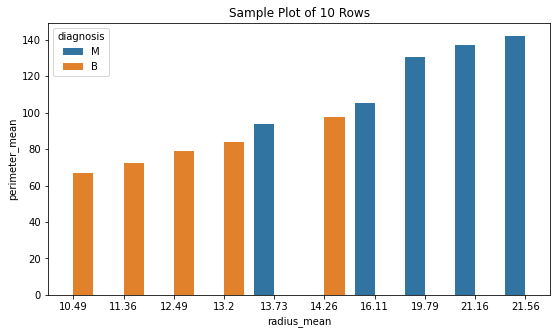

In [95]:
# Exploring the dataset
# A quick look at 10 rows of the dataset using the radius mean and perimeter mean columns
sample = data.sample(10)
sample
fig = plt.figure(figsize=(9,5))
sns.barplot(data=sample, x="radius_mean", y="perimeter_mean", hue="diagnosis")
plt.title("Sample Plot of 10 Rows")
plt.savefig('Sample Plot of 10 Rows.png')
plt.show();

C:\Users\JOYCE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


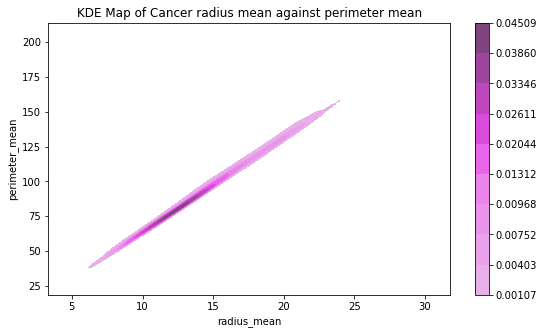

In [96]:
fig = plt.figure(figsize=(9,5))
sns.kdeplot(data.radius_mean,data.perimeter_mean, color="violet", shade= True, cbar= True)
plt.title("KDE Map of Cancer radius mean against perimeter mean")
plt.savefig('Sample Plot of 10 Rows.png')
plt.show();

In [ ]:
# A look at the the density map above shows the concentration of radius mean value at 15

In [97]:
# The following table shows the correlation of the dataset.
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
id,1.000000,0.075350,0.100756,0.073806,0.097972,-0.011068,-0.001510,0.050014,0.043858,-0.024164,...,0.081840,0.064564,0.079474,0.106366,0.009829,-0.004538,0.022621,0.034633,-0.043408,-0.031620
radius_mean,0.075350,1.000000,0.333046,0.997859,0.987269,0.175538,0.504040,0.674439,0.821894,0.154164,...,0.968065,0.305228,0.963457,0.938709,0.121082,0.412875,0.523596,0.742126,0.164202,0.010554
texture_mean,0.100756,0.333046,1.000000,0.338960,0.328237,-0.040782,0.248884,0.312105,0.300493,0.063187,...,0.366104,0.912805,0.373450,0.355693,0.055032,0.292090,0.311845,0.304024,0.098194,0.129833
perimeter_mean,0.073806,0.997859,0.338960,1.000000,0.986285,0.212419,0.555001,0.713784,0.850283,0.189828,...,0.968295,0.311328,0.968950,0.939365,0.152169,0.455464,0.560598,0.769221,0.191069,0.054558
area_mean,0.097972,0.987269,0.328237,0.986285,1.000000,0.178994,0.495424,0.682567,0.821967,0.157765,...,0.961780,0.294411,0.957767,0.957390,0.123362,0.389330,0.508116,0.719254,0.141837,0.006622
smoothness_mean,-0.011068,0.175538,-0.040782,0.212419,0.178994,1.000000,0.656587,0.523786,0.557107,0.555623,...,0.216897,0.030197,0.245210,0.208176,0.799669,0.465383,0.440146,0.502104,0.399238,0.481355
compactness_mean,-0.001510,0.504040,0.248884,0.555001,0.495424,0.656587,1.000000,0.883265,0.830120,0.604754,...,0.534916,0.257571,0.589439,0.508012,0.560065,0.866448,0.816015,0.815087,0.533566,0.689214
concavity_mean,0.050014,0.674439,0.312105,0.713784,0.682567,0.523786,0.883265,1.000000,0.920327,0.508095,...,0.688196,0.309294,0.728972,0.674500,0.448545,0.757313,0.883325,0.860399,0.424790,0.519262
concave_points_mean,0.043858,0.821894,0.300493,0.850283,0.821967,0.557107,0.830120,0.920327,1.000000,0.469329,...,0.831311,0.300092,0.856439,0.809377,0.455507,0.669175,0.750679,0.909763,0.392195,0.373401
symmetry_mean,-0.024164,0.154164,0.063187,0.189828,0.157765,0.555623,0.604754,0.508095,0.469329,1.000000,...,0.198118,0.083834,0.230324,0.190788,0.429608,0.476025,0.438219,0.440103,0.711924,0.435295


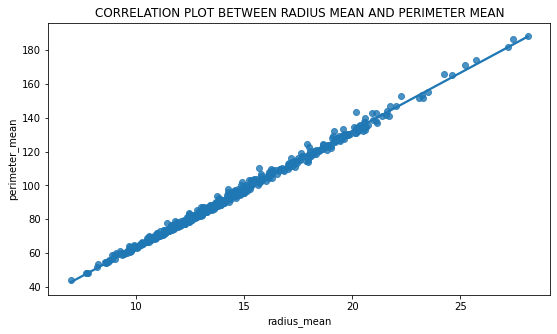

In [98]:
# The regression plot shows a Strong positive correlation between radius mean and perimeter mean in the dataset
fig = plt.figure(figsize=(9,5))
sns.regplot(x = data["radius_mean"], y =data["perimeter_mean"] )
plt.title("Correlation plot between radius mean and perimeter mean".upper())
plt.savefig('Correlation plot between radius mean and perimeter mean.png')
plt.show();

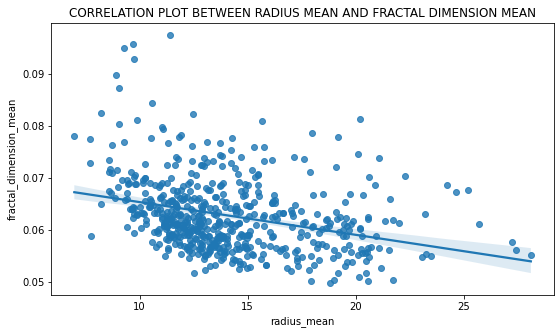

In [99]:
# There is negative correlation between radius mean and fractual dimension dimension mean
# that means an increase in radius mean does not translate to an increase in dimension mean
fig = plt.figure(figsize=(9,5))
sns.regplot(x = data["radius_mean"], y =data["fractal_dimension_mean"])
plt.title("Correlation plot between radius mean and fractal dimension mean".upper())
plt.savefig('Correlation plot between radius mean and fractal dimension mean.png')
plt.show();

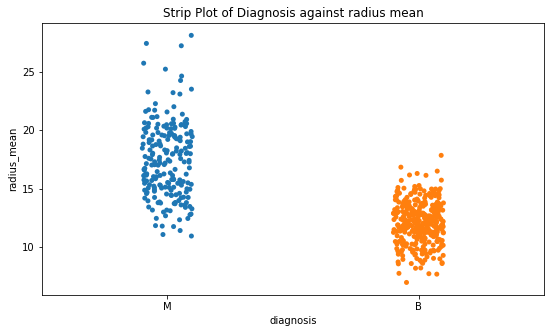

In [100]:
# The stripplot shows that the Malignant cancer has a higher radius mean than the benign cancer
fig = plt.figure(figsize=(9,5))
sns.stripplot(data = data , x = "diagnosis" , y = "radius_mean")
plt.title("Strip Plot of Diagnosis against radius mean")
plt.savefig('Strip Plot of Diagnosis against radius mean.png')
plt.show();

# Insights and More with Visualization

In [101]:
avg_texture = data["texture_mean"].mean()
avg_texture

19.293430656934326

In [102]:
high_texure = data.query("texture_mean > 19.29")
low_texture = data.query("texture_mean < 18.29") 

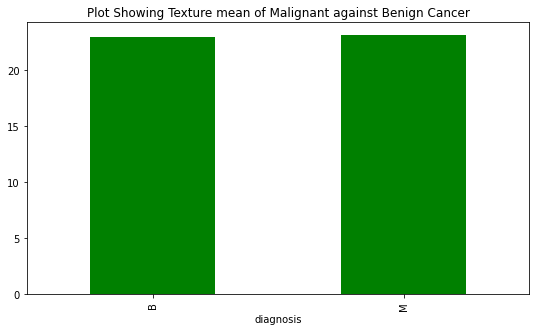

In [107]:
fig = plt.figure(figsize=(9,5))
high_texure.groupby("diagnosis")["texture_mean"].mean().plot(kind = "bar", color="green")
plt.title("Plot Showing Texture mean of Malignant against Benign Cancer")
plt.savefig('Plot of Diagnosis against Radius mean.png')
plt.show();

Finding the relationship between certain variables in the dataset

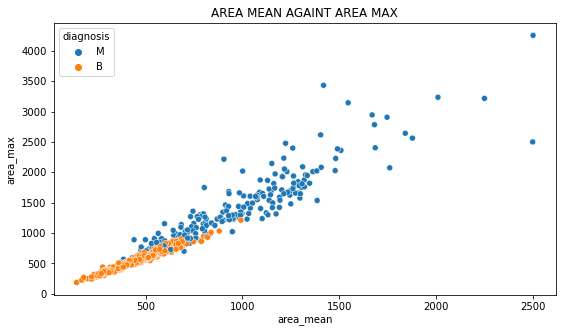

In [108]:
# Plotting the area mean against the area max
fig = plt.figure(figsize=(9,5))
sns.scatterplot(data = data, x="area_mean", y="area_max", hue="diagnosis")
plt.title("Area mean againt area max".upper())
plt.savefig('Area mean againt area max.png')
plt.show();

In [109]:
save = data.to_csv("cleaned_cancer_data.csv")